In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
%matplotlib inline

data = pd.read_csv(r"C:\Users\sinha\Downloads\diabetes2.csv")
data.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
print("Total number of patients: "+str(len(data.index)))

Total number of patients: 768


# Data Analyzing

<AxesSubplot:xlabel='Outcome', ylabel='count'>

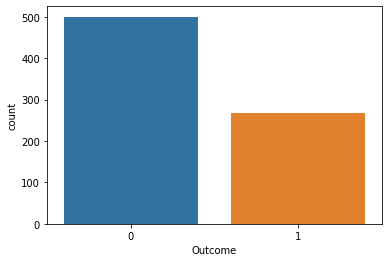

In [5]:
sns.countplot(x="Outcome", data=data)

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

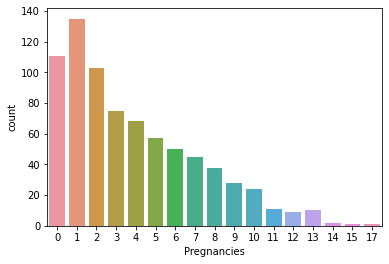

In [7]:
sns.countplot(x="Pregnancies", data=data)

<AxesSubplot:ylabel='Frequency'>

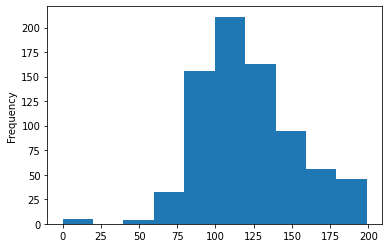

In [8]:
data["Glucose"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

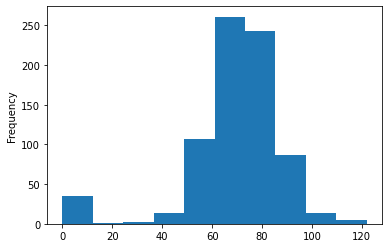

In [9]:
data["BloodPressure"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

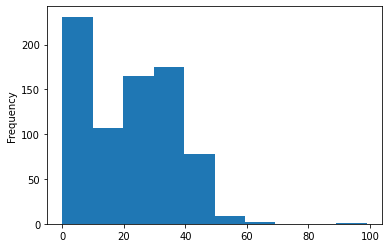

In [11]:
data["SkinThickness"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

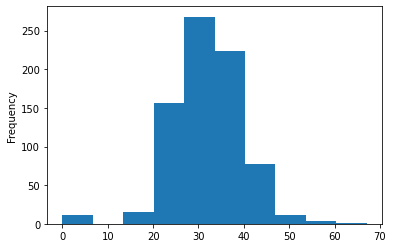

In [12]:
data["BMI"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

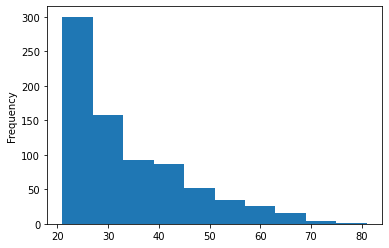

In [13]:
data["Age"].plot.hist()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
#Defining the set of independent variable(X) and dependent Variable

X = data.drop("Outcome", axis = 1)
Y = data["Outcome"]

#Shape of X

sz1=X.shape

#changing to numpy array

X = X.to_numpy()
Y = Y.to_numpy()


#adding a column of once to X matrix

X=np.concatenate((X,np.ones([sz1[0],1])),axis=1)

#splitting the data into training and test set

X_train=X[0:600,:]
X_test=X[600:768,:]
Y_train=Y[0:600]
Y_test=Y[600:768]
print(X_train.shape)
print(X_test.shape)

(600, 9)
(168, 9)


0
[[ 1.17618206e-01]
 [ 2.31870803e-01]
 [-3.28297907e+00]
 [-5.79460195e-01]
 [ 3.58198280e+00]
 [-5.87412085e-01]
 [ 2.09996959e-03]
 [-6.85916502e-01]
 [-5.62256006e-02]]


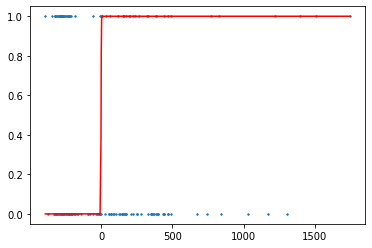

In [30]:
sz = X.shape
nic = sz[1]
iterations = 1000
L = 0.001

#initializing parameters

b = np.zeros([nic,1],dtype=float)
D_b = np.zeros([nic,1],dtype=float)
n=np.prod(Y_train.shape)

for i in range(iterations):
    if i%1000==0:
        print(i)
    h_b=1./(1+np.exp(-np.matmul(X_train,b)))  #using sigmoid function
    
    kp=0
    for j in range(nic):
        D_b[j]=np.mean(np.multiply((Y_train-h_b),X_train[:,kp]))   #differenciation of the cost function
        b[j]=b[j]+L*D_b[j]   #updation parameter value
        kp=kp+1

print(b)

Y_pred=1./(1+np.exp(-np.matmul(X_test,b)))  #making prediction

# thresholding the values

Y1=Y_pred-0.5;
sp=np.where(Y1<0)
Y1[sp]=0
sp=np.where(Y1>0)
Y1[sp]=1
Y1=Y1.flatten()

# sorting the values

Xb1=np.sort(np.transpose(np.matmul(X_test,b)),axis=None)
Yb1=np.sort(np.transpose(Y_pred),axis=None)

#plotting the graph

plt.plot(Xb1,Yb1,color='red')
plt.scatter(np.matmul(X_test,b),Y_test,s=2)

plt.show()